<a href="https://colab.research.google.com/github/madhumithadasarathy/My_Projects/blob/main/Emission_of_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement

CO2 emissions are majorly responsible for global climate change. Excess CO2 emissions causes severe air pollution and many people suffer from respiratory disorders. Automobiles are a major source of CO2 emissions. Thus, it is important to measure the CO2 emission to maintain a healthy environment for all living beings on earth.

Implement multiple linear regression to create a predictive model capable of estimating CO2 emission of cars based on different data of the car models. Also, evaluate the accuracy of the prediction model.






---

### List of Activities

**Activity 1:** Analysing the Dataset


**Activity 2:** Train-Test Split

**Activity 3:**  Model Training

**Activity 4:** Model Prediction

**Activity 5:** Model Evaluation







---

In [ ]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# Loading the dataset
# Dataset Link: 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/FuelConsumptionCo2.csv'
df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/FuelConsumptionCo2.csv")
# Printing first five rows using head() function
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


In [ ]:
# Checking if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
# Getting the list of columns of the dataset.
columns_list = list(df.columns)
columns_list

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

---

In [ ]:
# Splitting the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
X = df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

---

In [ ]:
# Building linear regression model
from sklearn.linear_model import LinearRegression

# Printing the value of the intercept
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train_reshaped)
# Printing the names of the features along with the values of their corresponding coefficients.
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}")
for item in list(zip(X.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")


Constant       298.363141
FUELCONSUMPTION_CITY 0.969310
FUELCONSUMPTION_HWY -5.363925
FUELCONSUMPTION_COMB 10.189179
FUELCONSUMPTION_COMB_MPG -4.623953


---

In [ ]:
# Predicting the target variable values for test set
y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)

---

In [ ]:
# Evaluating the model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module for the test set.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped, y_train_pred):.3f}")

print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.839
Mean Squared Error: 643.811
Root Mean Squared Error: 25.373
Mean Absolute Error: 16.138


Test Set
--------------------------------------------------
R-squared: 0.847
Mean Squared Error: 616.919
Root Mean Squared Error: 24.838
Mean Absolute Error: 15.721


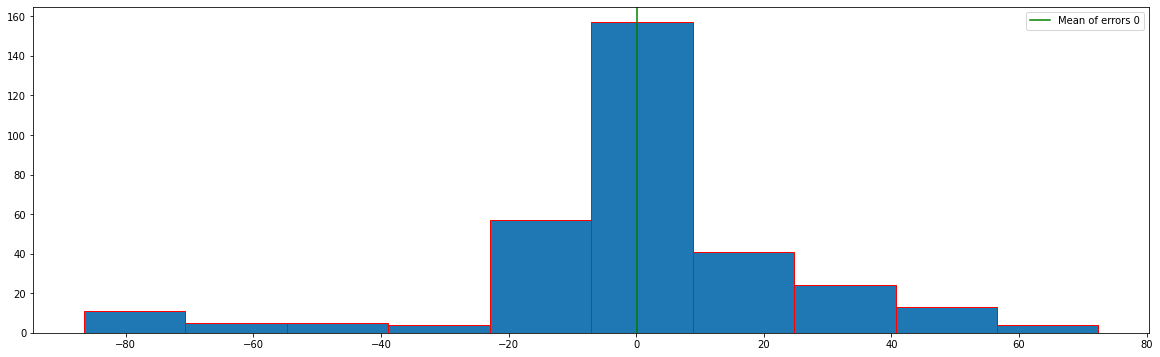

In [ ]:
# Creating a histogram for the errors obtained in the predicted values for the test set
test_error = y_test_reshaped - y_test_pred
plt.figure(figsize=(20,6))
plt.hist(test_error,bins = "sturges",edgecolor = "red")
plt.axvline(x=test_error.mean(),label=f"Mean of errors {round(test_error.mean())}",color="green")
plt.legend()
plt.show()

**Q:** What is the mean of errors for the test test? Is it zero?

**A:** Yes, the mean of errors for the test set is zero.



---